## 데이터 분석 노트북
- 아래와 같은 목적으로 데이터를 분석한 결과를 포함한 노트북 파일입니다.

### 목적
- 데이터의 분포와 특성을 파악하여 인사이트를 도출합니다.
- 데이터의 데이터 분포를 확인해 새로운 feature를 생성합니다.
- 데이터 전처리 방향을 결정합니다.

### 분석 계획
1. 데이터 기본 정보 확인
   - 데이터 크기, 컬럼 정보
   - 결측치, 중복값 확인
   - 데이터 타입 확인

2. EDA (탐색적 데이터 분석)
   - 수치형 변수 분포 확인 (히스토그램, 박스플롯)
   - 범주형 변수 분포 확인 (막대그래프, 파이차트)
   - 상관관계 분석
   - 이상치 탐지

3. Feature Engineering
   - 새로운 특성 생성
   - 특성 변환 및 스케일링 검토
   - 특성 선택 및 제거

4. 시각화
   - 주요 인사이트 시각화
   - 변수 간 관계 시각화

In [11]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style("whitegrid")  # 또는 다른 스타일: "darkgrid", "white", "dark", "ticks"
plt.rc('font', family='AppleGothic') # Mac OS용 한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# 데이터 로드
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [12]:
# 1. 데이터 기본 정보 확인
print("=== 데이터 크기 ===")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}\n")

print("=== 데이터 정보 ===")
print(train_df.info())
print("\n=== 기술통계량 ===")
print(train_df.describe())

print("\n=== 결측치 확인 ===")
print(train_df.isnull().sum())

print("\n=== 중복값 확인 ===")
print(f"중복된 행의 수: {train_df.duplicated().sum()}")

=== 데이터 크기 ===
Train shape: (10000, 18)
Test shape: (2062, 17)

=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float

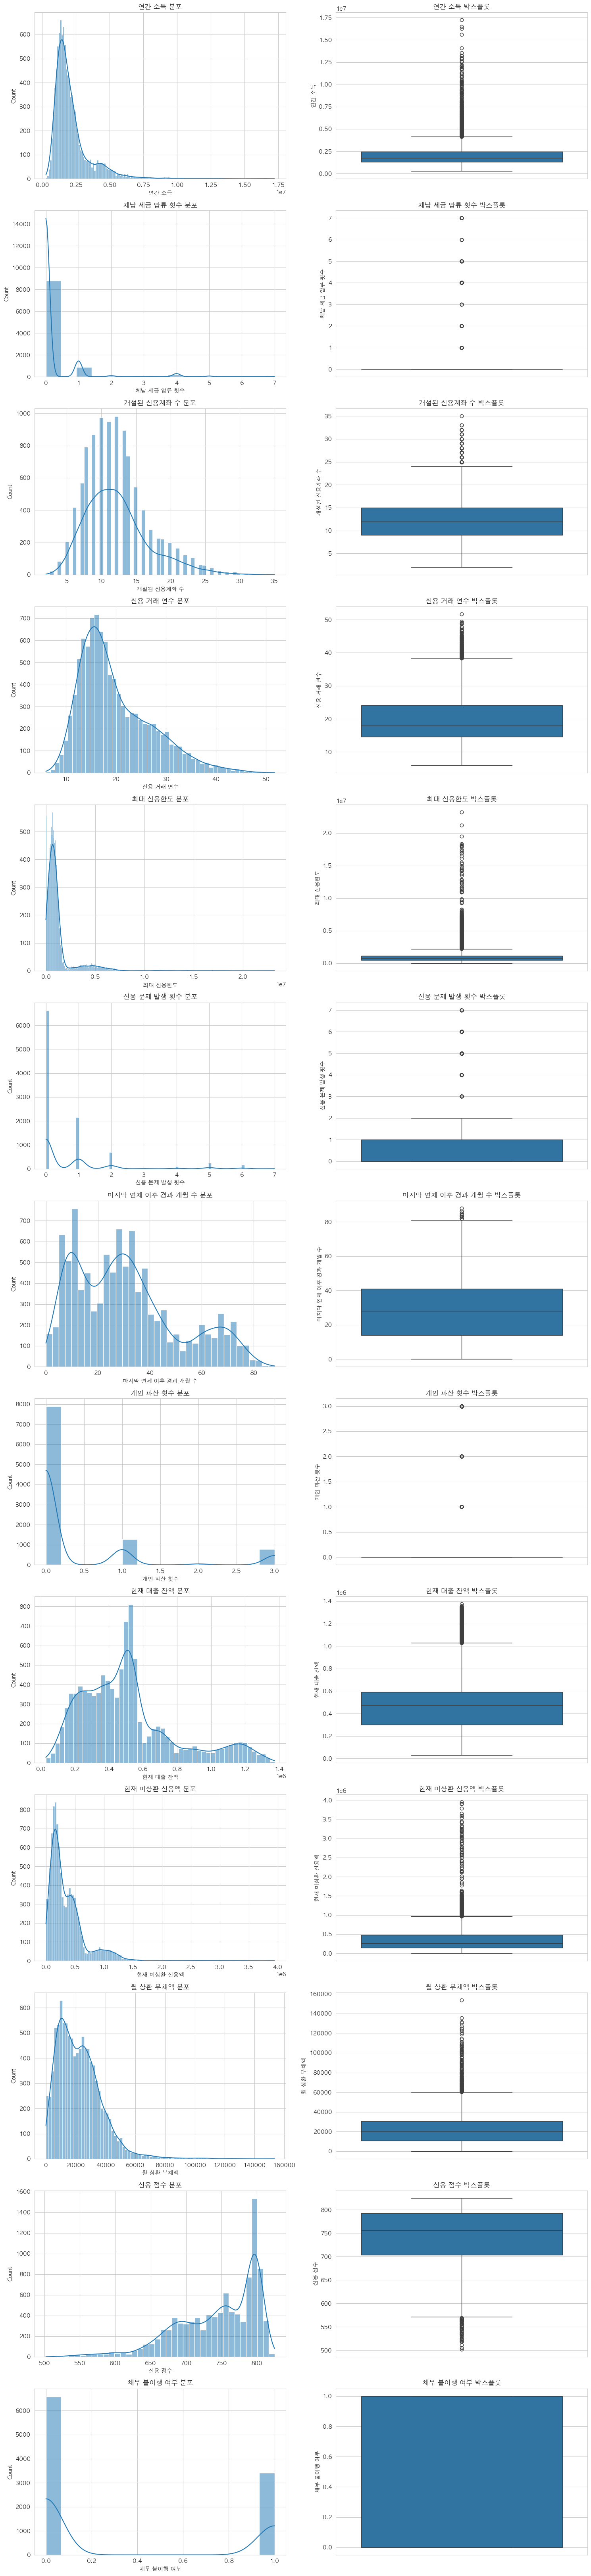

In [19]:
# 2. EDA (탐색적 데이터 분석)
# 수치형/범주형 변수 분리
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

# 수치형 변수 분포 시각화
plt.figure(figsize=(15, 5*len(numeric_features)))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 2, 2*i-1)
    sns.histplot(data=train_df, x=feature, kde=True)
    plt.title(f'{feature} 분포')
    
    plt.subplot(len(numeric_features), 2, 2*i)
    sns.boxplot(data=train_df, y=feature)
    plt.title(f'{feature} 박스플롯')
plt.tight_layout()
plt.show()

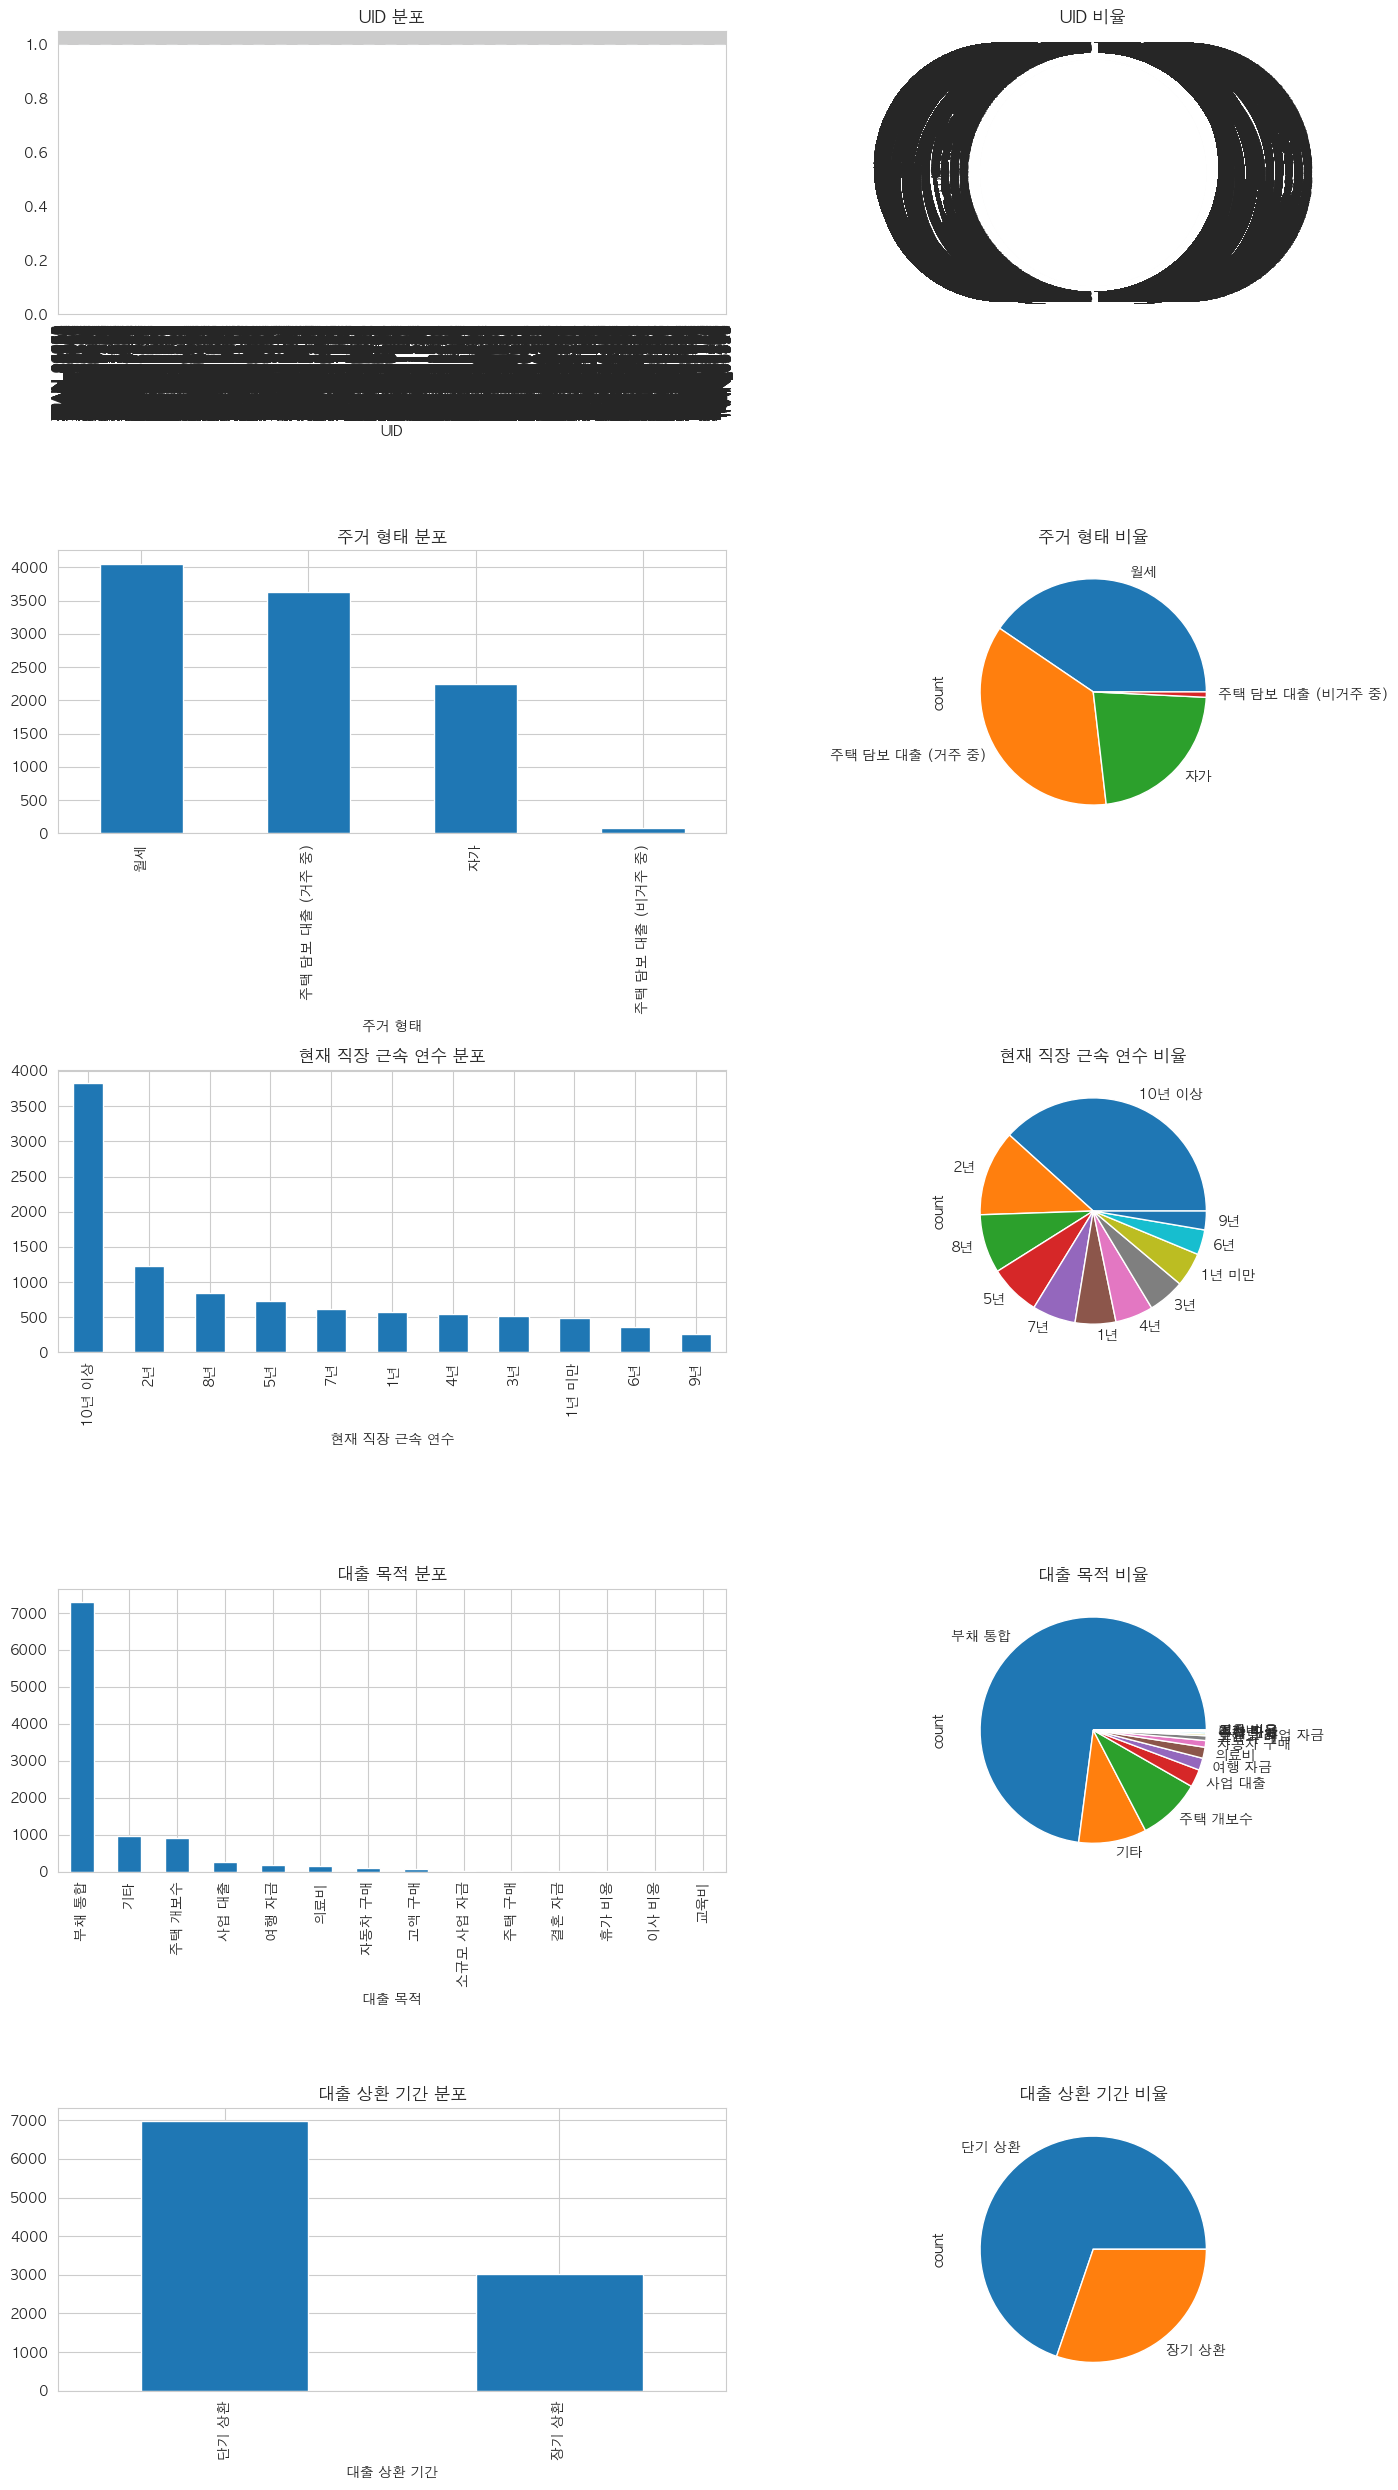

In [20]:
# 범주형 변수 분포 시각화
plt.figure(figsize=(15, 5*len(categorical_features)))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 2, 2*i-1)
    train_df[feature].value_counts().plot(kind='bar')
    plt.title(f'{feature} 분포')
    
    plt.subplot(len(categorical_features), 2, 2*i)
    train_df[feature].value_counts().plot(kind='pie')
    plt.title(f'{feature} 비율')
plt.tight_layout()
plt.show()

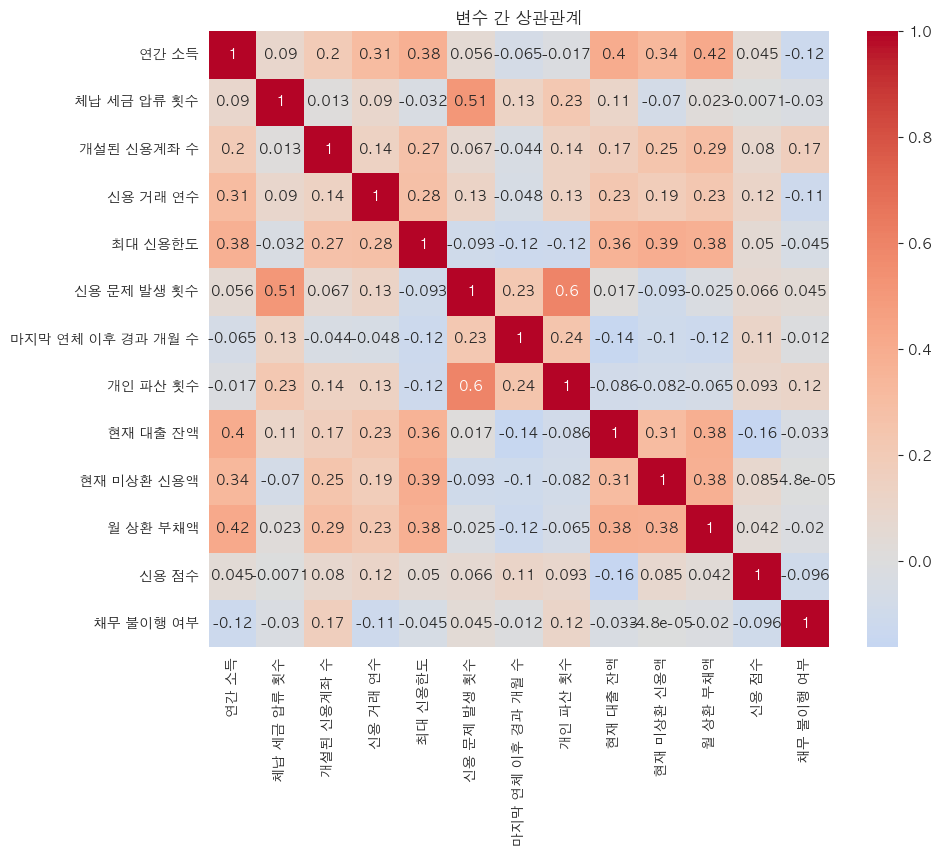

In [21]:
# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numeric_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('변수 간 상관관계')
plt.show()

이 상관관계 히트맵을 분석해보겠습니다:

강한 양의 상관관계 (0.5 이상):
1. 신용 문제 발생 횟수와 개인 파산 횟수 (0.6)
2. 체납 세금 압류 횟수와 신용 문제 발생 횟수 (0.51)

중간 정도의 양의 상관관계 (0.3~0.5):
1. 연간 소득과 월 상환 부채액 (0.42)
2. 연간 소득과 현재 대출 잔액 (0.4)
3. 최대 신용한도와 현재 미상환 신용액 (0.39)
4. 최대 신용한도와 월 상환 부채액 (0.38)
5. 현재 대출 잔액과 월 상환 부채액 (0.38)

주목할 만한 음의 상관관계:
1. 대부분의 음의 상관관계는 약한 편입니다 (-0.2 미만은 거의 없음)

중요한 인사이트:
1. 신용 문제와 관련된 변수들(신용 문제 발생 횟수, 개인 파산 횟수, 체납 세금 압류 횟수)은 서로 강한 양의 상관관계를 보입니다. 이는 한 종류의 신용 문제가 있는 고객은 다른 종류의 신용 문제도 함께 가지고 있을 가능성이 높다는 것을 의미합니다.

2. 재무적 규모와 관련된 변수들(연간 소득, 월 상환 부채액, 현재 대출 잔액, 최대 신용한도)도 서로 양의 상관관계를 보입니다. 이는 소득이 높은 사람들이 더 큰 금액의 대출과 부채를 가지고 있음을 시사합니다.

3. 채무 불이행 여부와 다른 변수들 간의 상관관계는 대체로 약한 편입니다. 이는 채무 불이행을 예측하기 위해서는 단일 변수가 아닌 여러 변수를 복합적으로 고려해야 할 필요가 있음을 시사합니다.

이러한 상관관계 분석은 신용평가 모델을 구축할 때 중요한 인사이트를 제공할 수 있으며, 특히 다중공선성을 고려할 때 참고할 수 있습니다.

In [27]:
# 이상치 탐지 (Z-score 방법)
def detect_outliers(df, features, threshold=3):
    outliers_dict = {}
    for feature in features:
        z_scores = np.abs(stats.zscore(df[feature]))
        outliers_dict[feature] = len(z_scores[z_scores > threshold])
    return outliers_dict

print("\n=== 이상치 탐지 결과 ===")
outliers = detect_outliers(train_df, numeric_features)
for feature, count in outliers.items():
    print(f"{feature}: {count}개({count / len(train_df[feature]) * 100:.2f}%)의 이상치 발견")


=== 이상치 탐지 결과 ===
연간 소득: 173개(1.73%)의 이상치 발견
체납 세금 압류 횟수: 230개(2.30%)의 이상치 발견
개설된 신용계좌 수: 79개(0.79%)의 이상치 발견
신용 거래 연수: 92개(0.92%)의 이상치 발견
최대 신용한도: 204개(2.04%)의 이상치 발견
신용 문제 발생 횟수: 418개(4.18%)의 이상치 발견
마지막 연체 이후 경과 개월 수: 0개(0.00%)의 이상치 발견
개인 파산 횟수: 772개(7.72%)의 이상치 발견
현재 대출 잔액: 2개(0.02%)의 이상치 발견
현재 미상환 신용액: 108개(1.08%)의 이상치 발견
월 상환 부채액: 133개(1.33%)의 이상치 발견
신용 점수: 119개(1.19%)의 이상치 발견
채무 불이행 여부: 0개(0.00%)의 이상치 발견


In [14]:
# 3. Feature Engineering
# 수치형 변수 스케일링 검토
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 스케일링 예시
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[numeric_features])
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features)

print("\n=== 스케일링 전후 비교 ===")
print("스케일링 전:")
print(train_df[numeric_features].describe())
print("\n스케일링 후:")
print(scaled_df.describe())


=== 스케일링 전후 비교 ===
스케일링 전:
              연간 소득   체납 세금 압류 횟수    개설된 신용계좌 수      신용 거래 연수       최대 신용한도  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  1.000000e+04   
mean   2.163959e+06      0.199300     12.248900     19.879360  1.175265e+06   
std    1.434430e+06      0.714304      4.620572      7.206693  1.604199e+06   
min    2.676210e+05      0.000000      2.000000      6.000000  0.000000e+00   
25%    1.311437e+06      0.000000      9.000000     14.600000  4.482476e+05   
50%    1.743223e+06      0.000000     12.000000     17.950000  7.670910e+05   
75%    2.447664e+06      0.000000     15.000000     24.100000  1.147283e+06   
max    1.722975e+07      7.000000     35.000000     51.700000  2.323233e+07   

       신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수      개인 파산 횟수      현재 대출 잔액  \
count  10000.00000       10000.000000  10000.000000  1.000000e+04   
mean       0.62620          30.889200      0.373200  5.061200e+05   
std        1.23419          20.011561      0.843797  

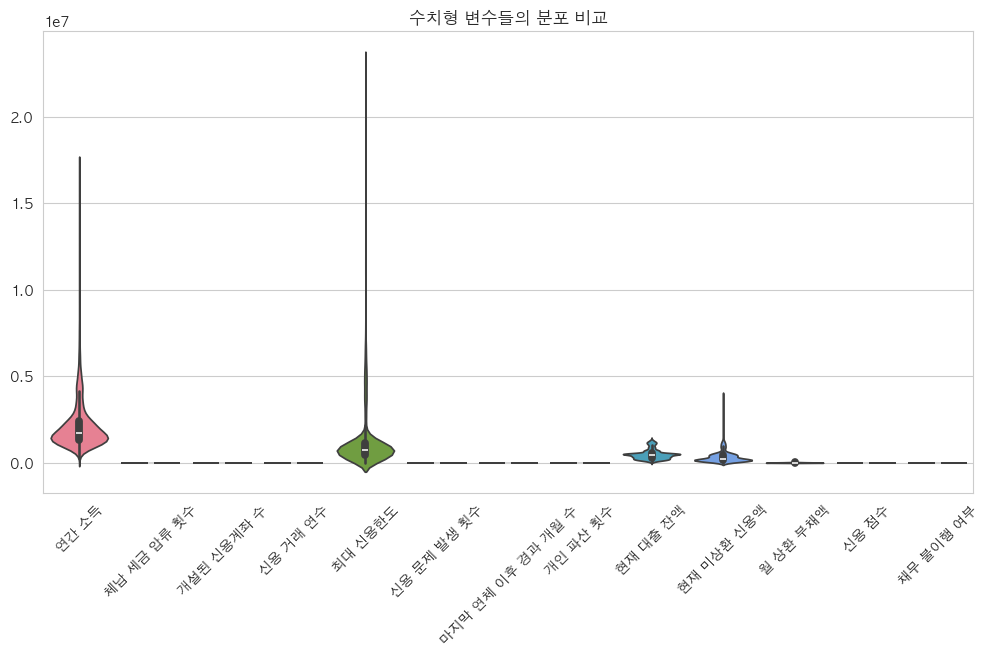

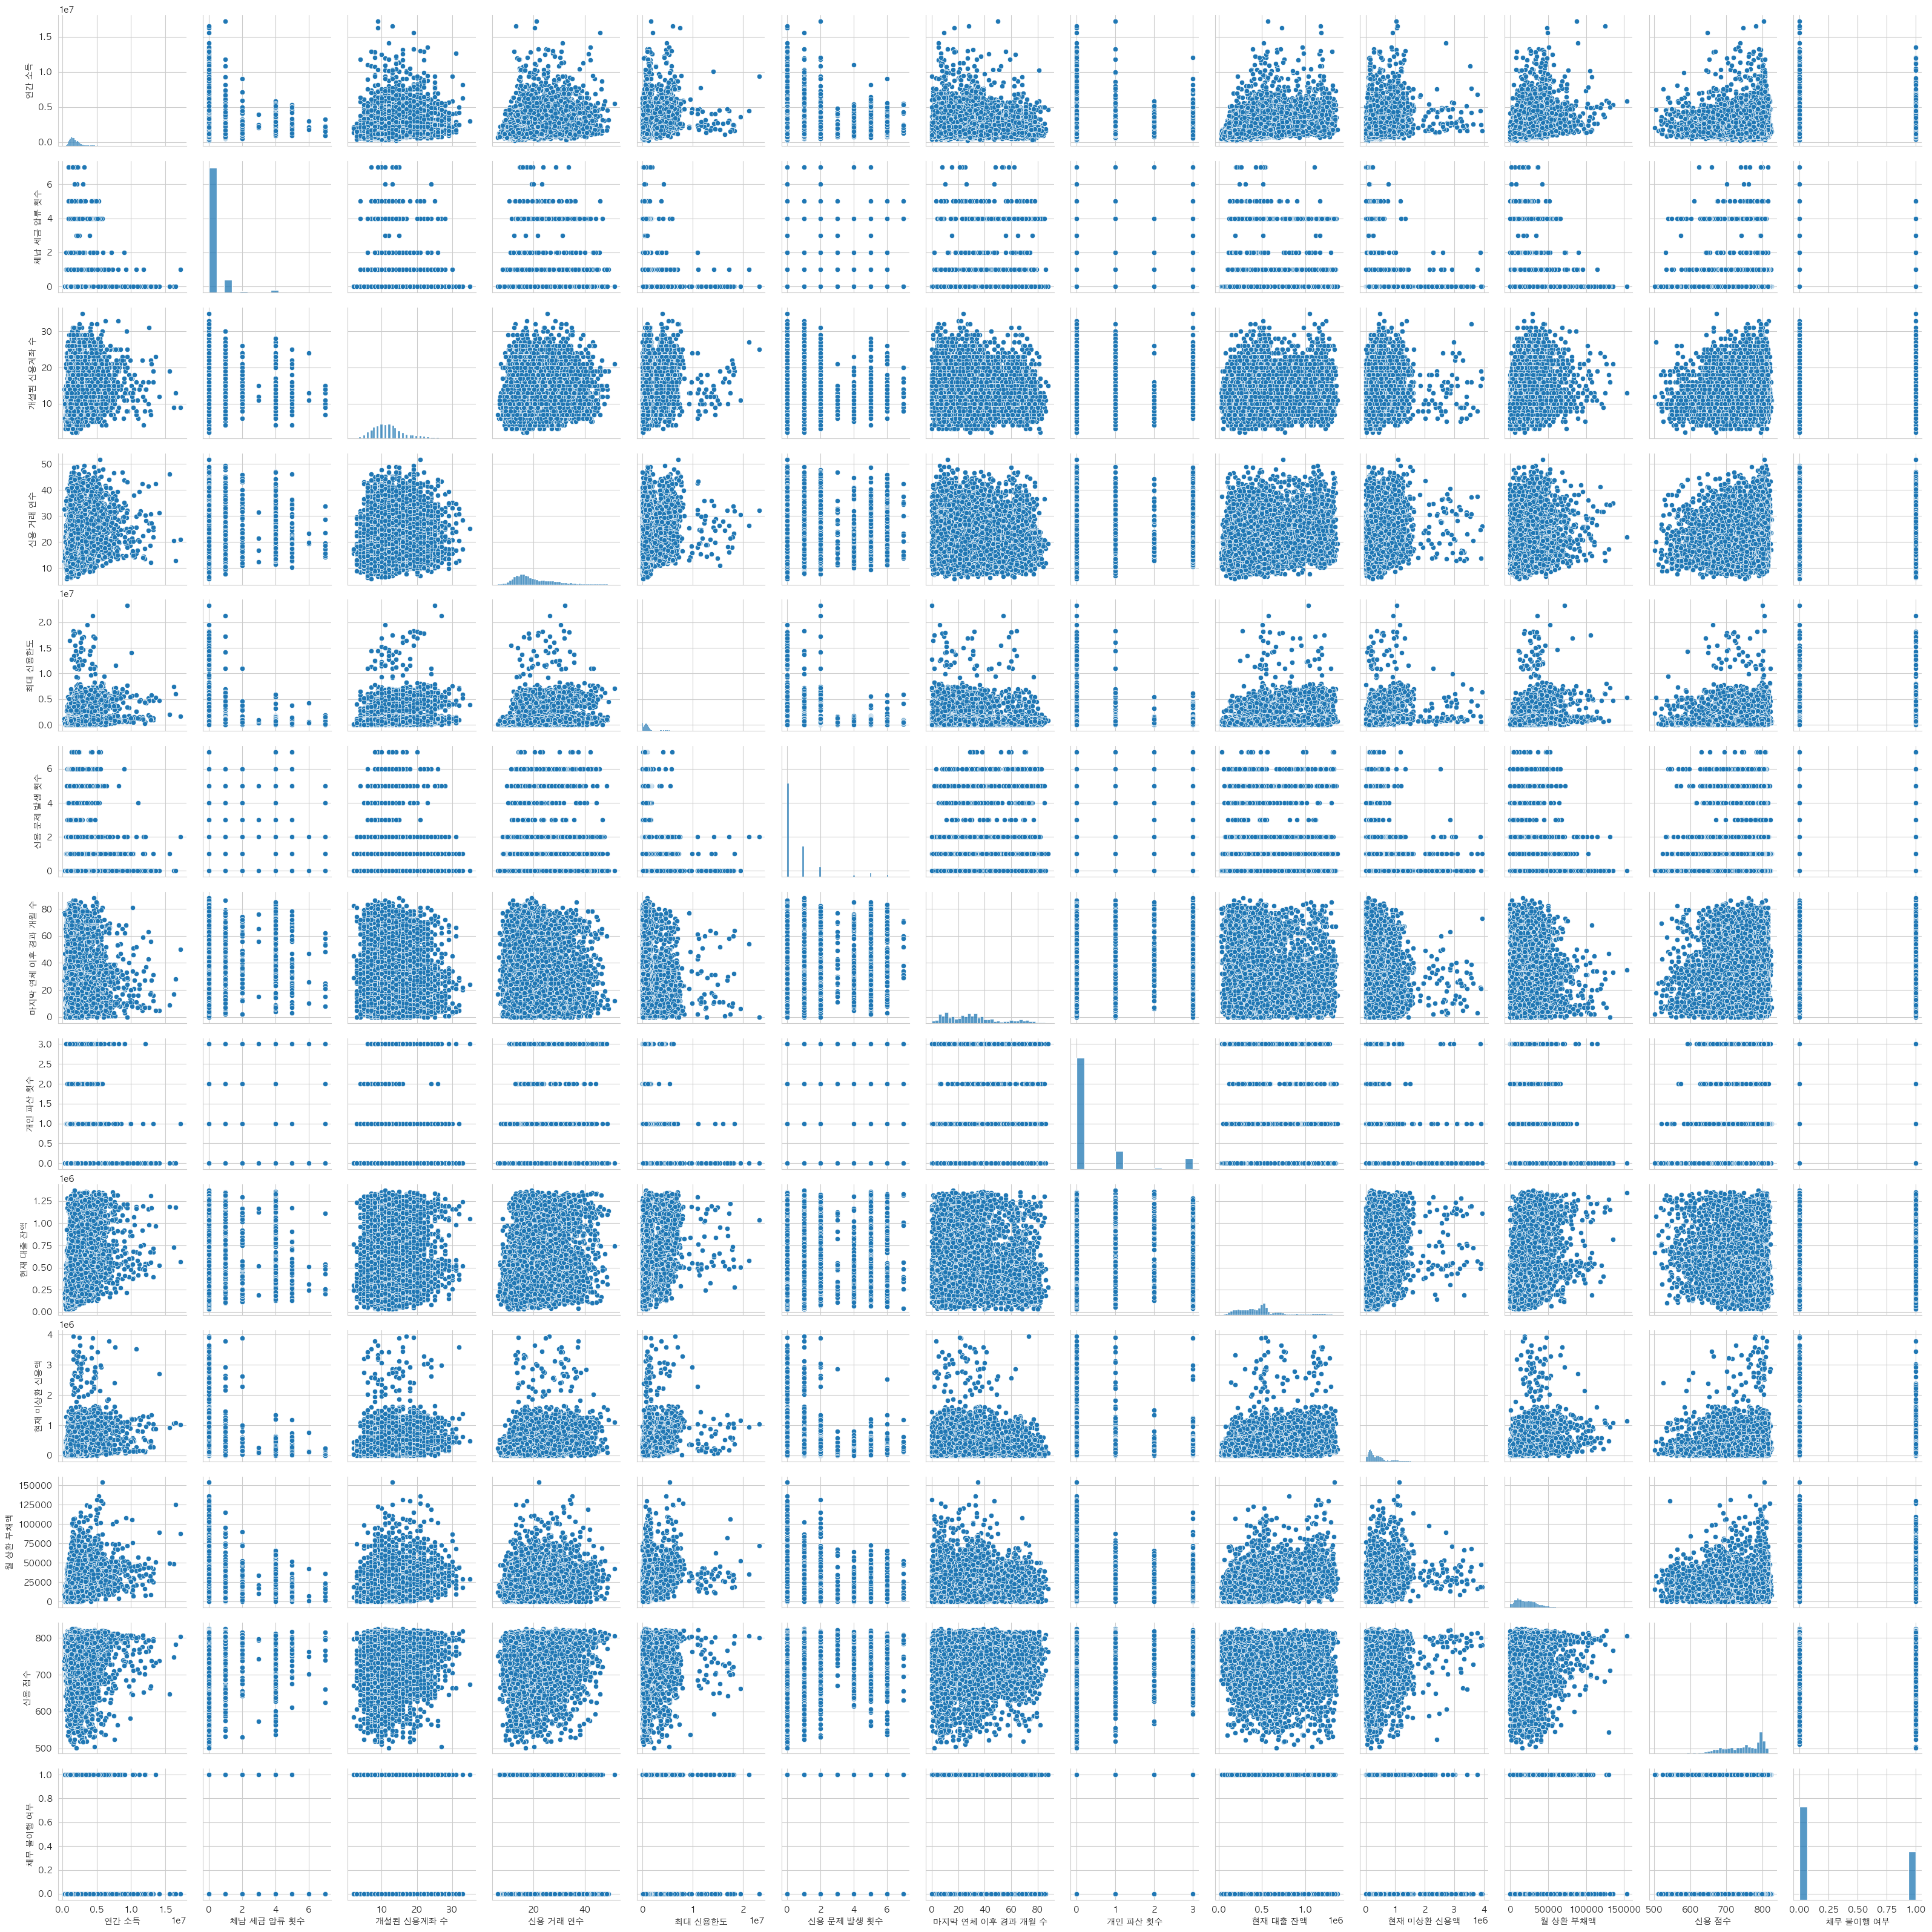

In [15]:
# 4. 시각화 - 주요 인사이트
# 예시: 수치형 변수들의 분포 비교
plt.figure(figsize=(12, 6))
sns.violinplot(data=train_df[numeric_features])
plt.title('수치형 변수들의 분포 비교')
plt.xticks(rotation=45)
plt.show()

# 변수 간 관계 시각화 (산점도 행렬)
sns.pairplot(train_df[numeric_features])
plt.show()

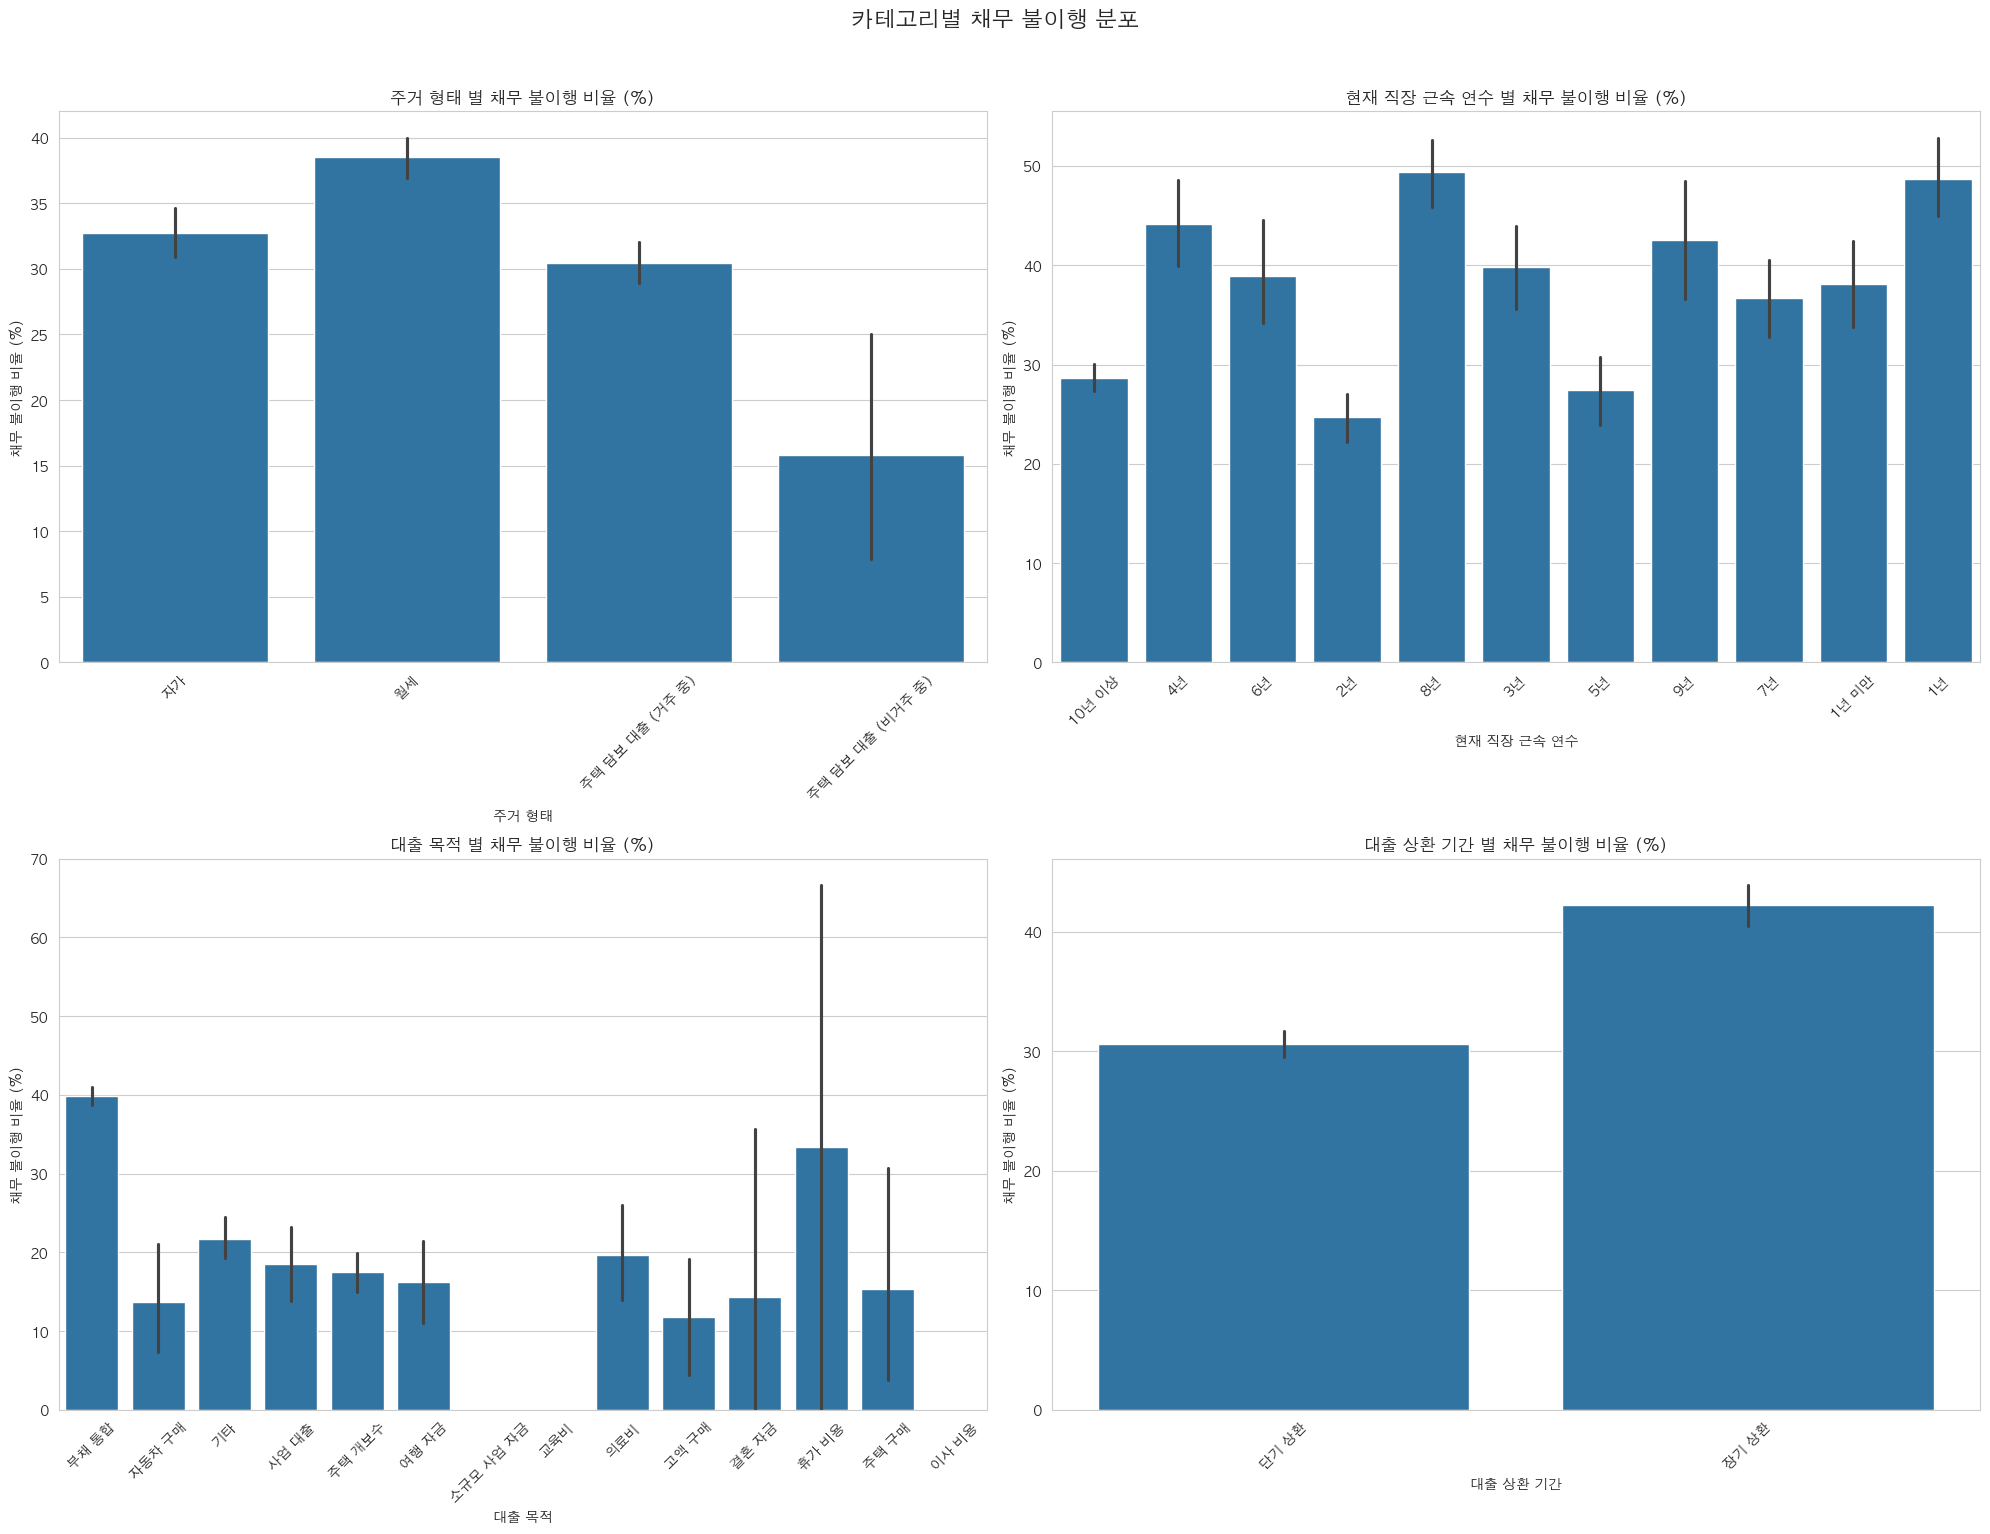


주거 형태별 채무 불이행 비율:
                  총 건수  불이행 비율(%)
주거 형태                            
월세                4050      38.49
자가                2241      32.75
주택 담보 대출 (거주 중)   3633      30.47
주택 담보 대출 (비거주 중)    76      15.79

현재 직장 근속 연수별 채무 불이행 비율:
             총 건수  불이행 비율(%)
현재 직장 근속 연수                 
10년 이상       3828      28.68
1년            581      48.71
1년 미만         488      38.11
2년           1225      24.73
3년            523      39.77
4년            541      44.18
5년            729      27.43
6년            357      38.94
7년            619      36.67
8년            841      49.35
9년            268      42.54

대출 목적별 채무 불이행 비율:
           총 건수  불이행 비율(%)
대출 목적                     
결혼 자금        14      14.29
고액 구매        68      11.76
교육비           3       0.00
기타          970      21.75
부채 통합      7294      39.85
사업 대출       254      18.50
소규모 사업 자금    26       0.00
여행 자금       173      16.18
의료비         158      19.62
이사 비용         4       0.00
자동차 구매       95      13.68
주택 개보

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카테고리형 컬럼 리스트
categorical_cols = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('카테고리별 채무 불이행 분포', fontsize=16, y=1.02)

# 각 카테고리별 시각화
for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    
    # 채무 불이행 비율 계산 및 시각화
    sns.barplot(data=train_df, 
                x=col, 
                y='채무 불이행 여부',
                ax=axes[row, col_idx],
                estimator=lambda x: len(x[x == 1]) / len(x) * 100)
    
    # 그래프 스타일링
    axes[row, col_idx].set_title(f'{col} 별 채무 불이행 비율 (%)')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('채무 불이행 비율 (%)')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 각 카테고리의 구체적인 수치 확인
for col in categorical_cols:
    print(f"\n{col}별 채무 불이행 비율:")
    default_ratio = train_df.groupby(col)['채무 불이행 여부'].agg(['count', 'mean'])
    default_ratio['mean'] = default_ratio['mean'] * 100
    default_ratio.columns = ['총 건수', '불이행 비율(%)']
    print(default_ratio.round(2))